# Detecting Power Laws from Real World Data

Code authored by: Shaw Talebi <br>
Blog link: https://medium.com/towards-data-science/detecting-power-laws-in-real-world-data-with-python-b464190fade6

### import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw # doc: https://pythonhosted.org/powerlaw/
import pandas as pd

np.random.seed(0)

### artificial data

In [2]:
def plot_histograms(data, title, var_name):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.hist(data)
    plt.title(title)
    plt.xlabel(var_name)
    plt.ylabel("Frequency")
    plt.grid()
    
    plt.subplot(1,2,2)
    plt.hist(np.log10(data))
    plt.title(title + " - Log Plot")
    plt.xlabel("log(" + var_name + ")")
    plt.ylabel("Frequency")
    plt.grid()

In [3]:
def compare_distribution_fits(results):
    """
        Function to compare power law fit to other distribution candidates

        Note:
        R = Loglikelihood ratio of the two distributions’ fit to the data. If greater than 0, the first distribution is preferred. 
        If less than 0, the second distribution is preferred.

        p = Significance of R
    """

    distribution_list = ['lognormal', 'exponential', 'truncated_power_law', 'stretched_exponential', 'lognormal_positive']
    
    for distribution in distribution_list:
        R, p = results.distribution_compare('power_law', distribution)
        print("power law vs " + distribution + ": R = " + str(np.round(R,3)) + ", p = " + str(np.round(p,3)))

In [4]:
def compute_power_law_p_val(results):
    """
        Function to compute power law test p value as described in arXiv:0706.1062 [physics.data-an]

        Authors use rule of thumb significance threshold of p>=0.1

        Note: the larger the p value the more plausible a power law fit
    """

    return sum(results.Ds > results.D)/len(results.Ds)

In [5]:
# power law data
a = 2
x_min = 1
n = 1_000
x = np.linspace(0, n, n+1)
s_pareto = (np.random.pareto(a, len(x)) + 1) * x_min

# log normal data
m = 10
s = 1
s_lognormal = np.random.lognormal(m, s, len(x)) * s * np.sqrt(2*np.pi)

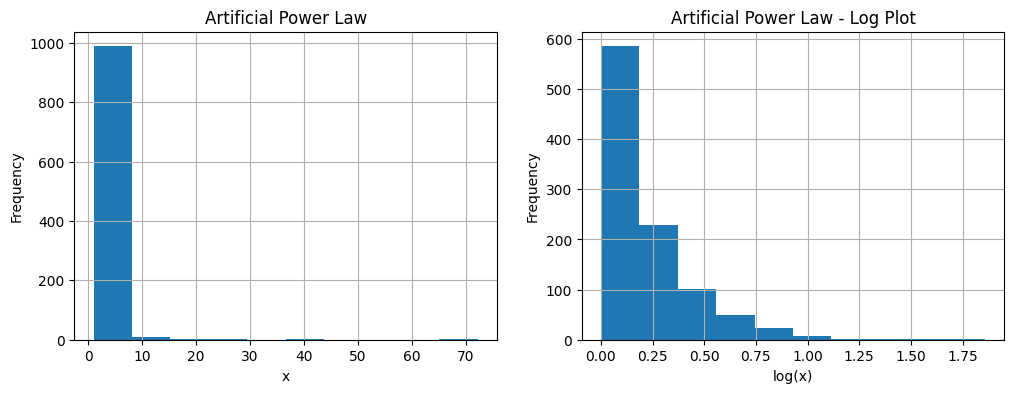

In [6]:
plot_histograms(s_pareto, "Artificial Power Law", "x")
plt.savefig("images/artificial_power-law.png")

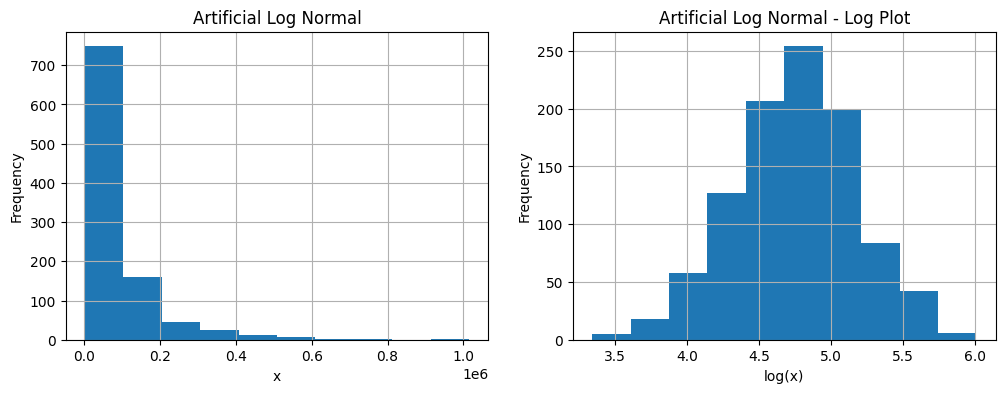

In [7]:
plot_histograms(s_lognormal, "Artificial Log Normal", "x")
plt.savefig("images/artificial_log-normal.png")

In [8]:
# fit power to power law data
results = powerlaw.Fit(s_pareto)
print("alpha = " + str(results.power_law.alpha)) # note: powerlaw lib's alpha definition is different than standard i.e. a_powerlawlib = a_standard + 1
print("x_min = " + str(results.power_law.xmin))
print('p = ' + str(compute_power_law_p_val(results)))

Calculating best minimal value for power law fit
alpha = 2.9331912195958676
x_min = 1.2703447024073973
p = 0.999


In [9]:
# compare to other distributions
compare_distribution_fits(results) # large p implies test does not favor one dist over another (insufficient data). small p implies R represents which dist is favored.

power law vs lognormal: R = 0.005, p = 0.879
power law vs exponential: R = 130.676, p = 0.006


Assuming nested distributions


power law vs truncated_power_law: R = 0.0, p = 0.997
power law vs stretched_exponential: R = 2.467, p = 0.319
power law vs lognormal_positive: R = 31.931, p = 0.003


In [10]:
# fit power to log normal data
results = powerlaw.Fit(s_lognormal)
print("alpha = " + str(results.power_law.alpha)) # note: powerlaw lib's alpha definition is different than standard i.e. a_powerlawlib = a_standard + 1
print("x_min = " + str(results.power_law.xmin))
print('p = ' + str(compute_power_law_p_val(results)))

# print lognormal parameters
print("")
print("mu = " + str(results.lognormal.mu))
print("sigma = " + str(results.lognormal.sigma))

Calculating best minimal value for power law fit
alpha = 2.5508694755027337
x_min = 76574.4701482522
p = 0.999

mu = 10.484956348018475
sigma = 1.0909168661399122


In [11]:
compare_distribution_fits(results)

power law vs lognormal: R = -8.369, p = 0.007
power law vs exponential: R = 6.031, p = 0.487
power law vs truncated_power_law: R = -10.344, p = 0.0
power law vs stretched_exponential: R = -9.321, p = 0.005
power law vs lognormal_positive: R = -8.369, p = 0.007


Assuming nested distributions


In [12]:
# fixing xmin so that fit must include all data
results = powerlaw.Fit(s_lognormal, xmin=np.min(s_lognormal))
print("alpha = " + str(results.power_law.alpha)) # note: powerlaw lib's alpha definition is different than standard i.e. a_powerlawlib = a_standard + 1
print("x_min = " + str(results.power_law.xmin))

print("")
print("mu = " + str(results.lognormal.mu))
print("sigma = " + str(results.lognormal.sigma))

alpha = 1.3087955873576855
x_min = 2201.318351239509

mu = 10.933481999687547
sigma = 0.9834599169175509


In [13]:
# when all data are included it is clear power law is not favored over any other distribution
compare_distribution_fits(results)

power law vs lognormal: R = -776.987, p = 0.0
power law vs exponential: R = -737.24, p = 0.0


Assuming nested distributions


power law vs truncated_power_law: R = -419.958, p = 0.0
power law vs stretched_exponential: R = -737.289, p = 0.0
power law vs lognormal_positive: R = -776.987, p = 0.0


### Social Media Data

In [14]:
filename_list = ['medium-followers', 'YT-earnings', 'LI-impressions']

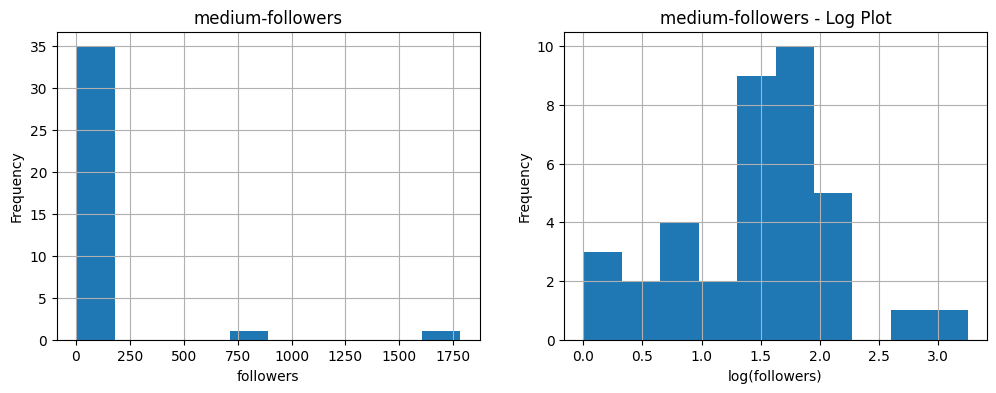

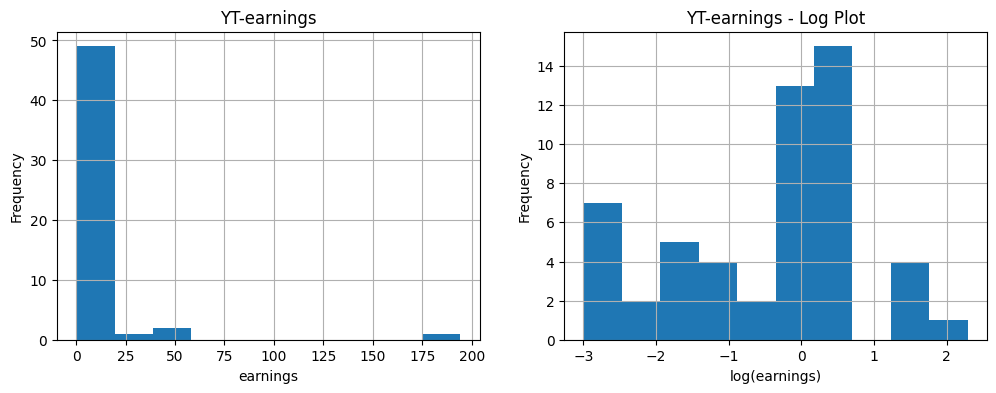

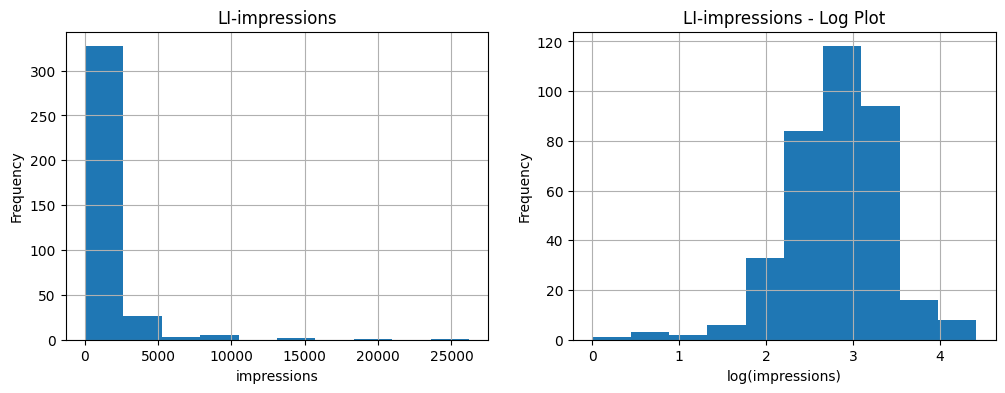

In [15]:
# plotting histograms
for filename in filename_list:
    df = pd.read_csv('data/'+filename+'.csv')
    plot_histograms(df.iloc[:,1][df.iloc[:,1]>0], filename, filename.split('-')[1])
    plt.savefig("images/empirical_"+filename+".png")

In [16]:
# printing basic statistics and power law fit results
for filename in filename_list:
    df = pd.read_csv('data/'+filename+'.csv')
    
    print(filename)
    print("-----------------")
    print("Basic Statistics")
    print(df.iloc[:,1].describe())
    
    print("")
    print("Top 5 Records by Percentage")
    print((df.iloc[:,1]/df.iloc[:,1].sum()).sort_values(ascending=False)[:5])
    
    print("")
    results = powerlaw.Fit(df.iloc[:,1], xmin=df.iloc[:,1].min())
    print("Power Law Fit")
    print("a = " + str(results.power_law.alpha))
    print("xmin = " + str(results.power_law.xmin))
    
    print("")
    print("Log Normal Fit")
    print("mu = " + str(results.lognormal.mu))
    print("sigma = " + str(results.lognormal.sigma))
    
    print("")
    print("Comparing Power Law to Other Fits")
    compare_distribution_fits(results)
    print("")
    print("")

medium-followers
-----------------
Basic Statistics
count      37.000000
mean      113.945946
std       308.664862
min         1.000000
25%        11.000000
50%        31.000000
75%        84.000000
max      1783.000000
Name: followers_gained, dtype: float64

Top 5 Records by Percentage
1    0.422913
2    0.180266
3    0.040560
4    0.039137
5    0.031072
Name: followers_gained, dtype: float64

Power Law Fit
a = 1.2942788495873196
xmin = 1.0

Log Normal Fit
mu = 3.273520645763708
sigma = 1.7482207134146353

Comparing Power Law to Other Fits
power law vs lognormal: R = -12.709, p = 0.007
power law vs exponential: R = 3.905, p = 0.767
power law vs truncated_power_law: R = -10.097, p = 0.0
power law vs stretched_exponential: R = -12.676, p = 0.003
power law vs lognormal_positive: R = -12.709, p = 0.007


YT-earnings
-----------------
Basic Statistics
count     56.000000
mean       6.938875
std       27.006833
min        0.000000
25%        0.029000
50%        0.659500
75%        2.473500


Assuming nested distributions
Values less than or equal to 0 in data. Throwing out 0 or negative values
/Users/shawhin/opt/anaconda3/envs/power-law/lib/python3.9/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
Assuming nested distributions


power law vs truncated_power_law: R = -210.094, p = 0.0
power law vs stretched_exponential: R = -422.689, p = 0.0
power law vs lognormal_positive: R = -425.472, p = 0.0


